<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px">1. INTRODUCTION</div>


## <font color=red>1.1.  Problem & Objective
The vast majority of the available data is actually unlabeled, so there is a huge potential in unsupervised learning that we can invest into. For instance, Topic modeling is one of the application of Unsupervised techniques. It is used to extract and depict key themes or topics which are latent in a large corpora of text documents. This analysis combines techniques in NLP and Unsupervised learning to perform the task of topic modeling. 

## <font color=red>1.2. Techniques</font>
    
The following techniques are applied for the task:    

**1. Text Preprocessing and Normalization**: Before feature engineering, we need to  pre-process, clean, and normalize text.

**2. Word Embedding for Feature Extraction**: For feature extraction, Word embedding is applied to transform each word to a numeric vector. Each word is assigned its own vector in such a way that words that frequently appear together in the same context are given vectors that are close together. So similar meaning words have similar representations, these vectors try to capture contextual and semantic information.
    
**3. Dimensionality Reduction with PCA and AutoEncoder**: Machine Learning algorithms have problems involving high dimensionality of features for each training instance. This makes it not only difficult to understand or explore the pattern of data, training time extremely slow, parameter estimation challenging, but also affects the machine learning model's performance since there are more chances to overfit the model or violate some of the assumptions of the algorithm. The problem is often referred to as the curse of dimensionality. This is where dimensionality reduction comes in. Dimensionality reduction is the process of reducing the number of random variables by obtaining a set of principal variables but still keep important information. The new variables are then used for downstream task such as Regression, Classification or Clusteringg    

**4. Clustering**:  Clustering is an unsupervesed learning method that divide the data points into a number of groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. Clusters found are represented topics in topic modeling problem

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">2. SETUP</div>

 ## <font color=red>2.1. Import library</font>

In [1]:
import joblib
import sys
import sklearn
import pandas as pd
import numpy as np

## for data
import collections
import json

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing text data
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import string
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.corpus import stopwords

# for calculating similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import  LabelEncoder

# for classification
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

## for word embedding
import gensim
import gensim.downloader as gensim_api
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
# deep learning library
from keras.models import *
from keras.layers import *
from keras.callbacks import *

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# display various ranges 
pd.options.display.float_format = '{:.3f}'.format

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print("Setup complete...")

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
NLTK: 3.6.5
Scikit-learn: 0.23.2
Pandas: 1.5.3
Numpy: 1.21.2
Setup complete...


 ## <font color=red>2.2. Utitlity functions</font>

In [2]:
def plot_cluster(X, y):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    ax[0].scatter(X[:,0], X[:,1], s=5)
    ax[1].scatter(X[:,0], X[:,1], c=y, s=5, cmap='jet')
    plt.axis("off")
    plt.show()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">3. NewsCategory DATASET</div>

The dataset used is “News category dataset” from Kaggle (https://www.kaggle.com/rmisra/news-category-dataset). This dataset is around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The original dataset contains over 30 categories, but for the purposes of this analysis, I will work with a subset of 4: TRAVEL, FOOD & DRINK, BUSINESS, SPORTS

 
 The following steps are applied for converting text data to numeric features:
 
 + Detect language and filter only English
 + Normalize text
 + Split data into train set and test set
 + Feature Extraction using word embedding with Word2Vec model
 + Scaling independent features
 + Convert target from categorical data to numeric data

 ## <font color=red>3.1.  Load dataset</font>

In [3]:
df = pd.read_csv('News_Category.csv')
print(df.shape)
## print 5 random rows
df = df.reset_index(drop=True)
df.head(5)

(26768, 4)


,category,headline,short_description,text
0,BUSINESS,"U.S. Launches Auto Import Probe, China Vows To...",The investigation could lead to new U.S. tarif...,"U.S. Launches Auto Import Probe, China Vows To..."
1,BUSINESS,Starbucks Says Anyone Can Now Sit In Its Cafes...,The new policy was unveiled weeks after the co...,Starbucks Says Anyone Can Now Sit In Its Cafes...
2,BUSINESS,Seattle Passes Controversial New Tax On City's...,"Following the council vote, Amazon’s vice pres...",Seattle Passes Controversial New Tax On City's...
3,BUSINESS,Uber Ends Forced Arbitration In Individual Cas...,Victims will be free to go to court -- but a f...,Uber Ends Forced Arbitration In Individual Cas...
4,BUSINESS,"Chili's Hit By Data Breach, Credit And Debit C...",The breach is believed to have occurred betwee...,"Chili's Hit By Data Breach, Credit And Debit C..."


Column 'text' is the concatenation of column 'headline' and 'short_description'. The analysis use column 'text'  to cluster data

View column text in the first five rows

In [6]:
for i in range(0,5):
    print(df.text[i])
    print('\n')

U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.


Starbucks Says Anyone Can Now Sit In Its Cafes -- Even Without Buying Anything. The new policy was unveiled weeks after the controversial arrest of two black men at a Philadelphia Starbucks.


Seattle Passes Controversial New Tax On City's Biggest Companies To Combat Housing Crisis. Following the council vote, Amazon’s vice president, Drew Herdener, said the company has resumed construction planning for its so-called Block 18 project in downtown Seattle.


Uber Ends Forced Arbitration In Individual Cases Of Sexual Assault, Harassment. Victims will be free to go to court -- but a few caveats remain.


Chili's Hit By Data Breach, Credit And Debit Card Information Compromised. The breach is believed to have occurred between March and April.




 ## <font color=red>3.2.  Text Preprocesing</font>

### <font color=blue>Detect Language</font>

In [7]:
import langdetect

txt = df["text"].iloc[0]
df["text"] = df["text"].astype(str)
df['lang'] = df["text"].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")
df = df[df["lang"]=="en"]
df.shape

(24889, 5)

### <font color=blue>Normalizing text</font>

In [8]:
def normalize_text(text, flg_stemm=False, flg_lemm=False, lst_stopwords=None):
    
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    # Removing Special Characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    # non_ascii
    # text = "".join(i for i in s if ord(i)<128)
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [9]:
lst_stopwords = nltk.corpus.stopwords.words("english")

df["text_clean"] = df["text"].apply(lambda x: normalize_text(x, flg_stemm=True, flg_lemm=True, lst_stopwords=lst_stopwords))

df.head()

,category,headline,short_description,text,lang,text_clean
0,BUSINESS,"U.S. Launches Auto Import Probe, China Vows To...",The investigation could lead to new U.S. tarif...,"U.S. Launches Auto Import Probe, China Vows To...",en,u launch auto import probe china vow defend in...
1,BUSINESS,Starbucks Says Anyone Can Now Sit In Its Cafes...,The new policy was unveiled weeks after the co...,Starbucks Says Anyone Can Now Sit In Its Cafes...,en,starbuck say anyon sit cafe even without buy a...
2,BUSINESS,Seattle Passes Controversial New Tax On City's...,"Following the council vote, Amazon’s vice pres...",Seattle Passes Controversial New Tax On City's...,en,seattl pas controversi new tax citi biggest co...
3,BUSINESS,Uber Ends Forced Arbitration In Individual Cas...,Victims will be free to go to court -- but a f...,Uber Ends Forced Arbitration In Individual Cas...,en,uber end forc arbitr individu case sexual assa...
4,BUSINESS,"Chili's Hit By Data Breach, Credit And Debit C...",The breach is believed to have occurred betwee...,"Chili's Hit By Data Breach, Credit And Debit C...",en,chili hit data breach credit debit card inform...


In [10]:
df.shape

(24889, 6)

### <font color=blue>Split dataset to train and test set</font>

In [11]:
## split dataset
df.rename(columns={'category':'y'}, inplace=True)
df_train, df_test = model_selection.train_test_split(df, test_size=0.1, random_state=9)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
## get target
y_train = df_train["y"].values
y_test = df_test["y"].values

In [12]:
df_train.head()

,y,headline,short_description,text,lang,text_clean
0,SPORTS,Tom Brady Says Gisele Bundchen Told Him To Shu...,The right call.,Tom Brady Says Gisele Bundchen Told Him To Shu...,en,tom bradi say gisel bundchen told shut polit r...
1,TRAVEL,Delta Air Lines Resumes Flights After Computer...,The company said via Twitter that it had cance...,Delta Air Lines Resumes Flights After Computer...,en,delta air line resum flight comput system suff...
2,FOOD & DRINK,10 Super Bowl Classics,If you're going to be parked on the couch for ...,10 Super Bowl Classics. If you're going to be ...,en,super bowl classic your go park couch sever ho...
3,SPORTS,Creator Wins Belmont Stakes By A Nose,Creator came from behind and won with a fierce...,Creator Wins Belmont Stakes By A Nose. Creator...,en,creator win belmont stake nose creator came be...
4,SPORTS,Women's Basketball Team Declined Trump's White...,Burrrrrn 🔥,Women's Basketball Team Declined Trump's White...,en,woman basketbal team declin trump white hous i...


In [13]:
df_test.head()

,y,headline,short_description,text,lang,text_clean
0,FOOD & DRINK,5 Chefs' Summer Recipes,Whether you're firing up the grill or want a c...,5 Chefs' Summer Recipes. Whether you're firing...,en,chef summer recip whether your fire grill want...
1,SPORTS,Liverpool Tops Manchester United 1-0: Daniel S...,The rivalry between the two sides began to int...,Liverpool Tops Manchester United 1-0: Daniel S...,en,liverpool top manchest unit daniel sturridg go...
2,SPORTS,"Bengals Win Because Of Science, Says Neil deGr...","The Coriolis effect, caused by the earth's rot...","Bengals Win Because Of Science, Says Neil deGr...",en,bengal win scienc say neil degrass tyson corio...
3,SPORTS,Lionel Messi Says He's Retiring From Internati...,After a brutal loss in the Copa America final.,Lionel Messi Says He's Retiring From Internati...,en,lionel messi say he retir intern soccer brutal...
4,TRAVEL,The Calm Before (and During) the Holiday Storm,Stress and anxiety can ruin yuletide festiviti...,The Calm Before (and During) the Holiday Storm...,en,calm holiday storm stress anxieti ruin yuletid...


#### Inspect unique values of y

In [14]:
df_train.y.value_counts()

TRAVEL          8481
FOOD & DRINK    5552
BUSINESS        4590
SPORTS          3777
Name: y, dtype: int64

It can be seen that news are divided into 4 categories represent 4 different topics need to be discovered using clustering techniques

 ## <font color=red>**3.3.  Feature Engineering**

### <font color=blue> Word Embedding technique
Word embedding is applied to transform each word to a numeric vector. Each word is assigned its own vector in such a way that words that frequently appear together in the same context are given vectors that are close together. So similar meaning words have similar representations, these vectors try to capture contextual and semantic information. 

1. Basically, a word embedding not only converts the word but also identifies the semantics and syntaxes of the world to build a vector representation of this information. The underlying concept is to use information from the words adjacent to the word.  
2. For example, the word for “lion” will be closer in value to “cat” than to “dandelion”
    
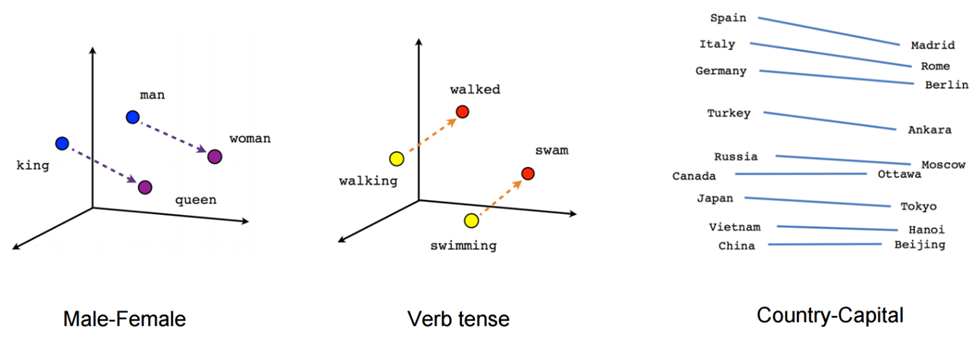
    
3. Some popular word embedding techniques include Word2Vec, GloVe, ELMo, FastText, etc    

### <font color='blue'>**Word embedding using Gensim Framework - word2vec**
    
1. The word2vec model was released by Google in 2013 and uses a neural network based implementation with architectures like continuous Bag of Words and Skip-Grams to learn the distributed vector representation of words in a corpus

2. Depending on the way the embeddings are learned, Word2Vec is classified into two approaches: Continuous Bag-of-Words (CBOW) model learns the focus word given the neighboring words whereas the Skip-gram model learns the neighboring words given the focus word. That’s why Continuous Bag Of Words and Skip-gram are inverses of each other
    
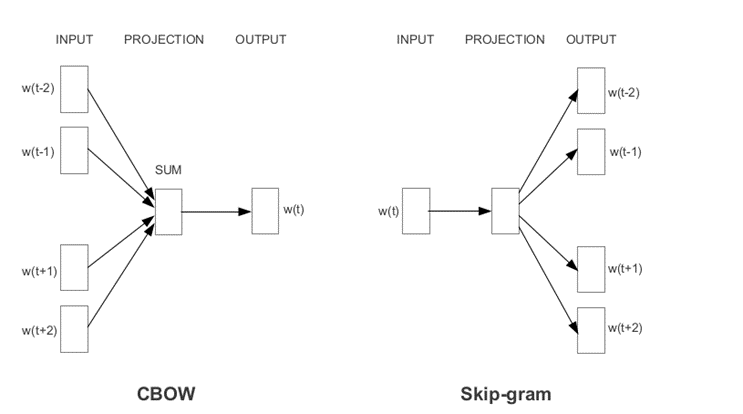

We will be using genism framework to implement the same model on our corpus to extract features. Some of the important parameters in the model are explained briefly as follows
+ Size: Represents the feature vector size for each word in the corpus when transformed
+ Window: Sets the context window size specifying the length of the window of words to be taken into account as belonging to a single, similar context when training
+ Min_count: Specifies the minimum word frequency value needed across the corpus to consider the word as a part of the final vocabulary during training the model
+ Sample: Used to downsample the effects of words which occur very frequently


#### create a corpus of word for both train set  and test set

In [15]:
# Set values for various parameters
feature_size = 300   # Word vector dimensionality
window_context= 30   # Context window size
min_word_count = 1  # Minimum word count
sample = 1e-3        # Downsample setting for frequent words

tokenized_corpus = []
for words in df_train['text_clean']:
    tokenized_corpus.append(words.split())
    
pretrained_model = Word2Vec(size=feature_size, window=window_context, min_count=min_word_count, workers=-1)
pretrained_model.build_vocab(tokenized_corpus)

In [16]:
pretrained_model.similarity('train','cat'),pretrained_model.similarity('train','travel'),  pretrained_model.similarity('dog','cat')

(0.13638102, -0.05793179, 0.095217995)

### <font color=blue>Word Vectorization using Google's Word2vec Pretrained Word Embedding</font>

This part employes the Word2vec model which was released by Google in 2013 and trained on the Google News dataset (about 100 billion words). It uses a neural network based implementation with architectures like continuous Bag of Words and Skip-Grams to learn the distributed vector representation of words in a corpus

In [17]:
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz'
pretrained_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)
pretrained_model.train(tokenized_corpus, total_examples=pretrained_model.corpus_count, epochs=5)

(0, 0)

In [18]:
pretrained_model.similarity('train','cat'),pretrained_model.similarity('train','travel'),  pretrained_model.similarity('dog','cat')

(0.08540114, 0.29063696, 0.76094574)

Now in order to create features to represent entire document (field text_clean), we can combine all words in the document by averaging word vector representation, where we simply sum all the word vectors occurring in a document and then divide by the count of word vectors to represent an averaged word vector for the document. After this step, we can use these features to build classification or clustering models

In [19]:
def vectorize(corpus, model):
    # global embeddings
    embeddings = []
    for line in corpus:
        w2v = None
        count = 0
        for word in line.split():
            if word in model.wv.vocab:
                count += 1
                if w2v is None:
                    w2v = model.wv[word]
                else:
                    w2v = w2v + pretrained_model.wv[word]
        if w2v is not None:
            w2v = w2v / count
            # append element to the end of the embeddings list
            embeddings.append(w2v)
        
    return embeddings

In [20]:
embeddings = vectorize(df_train['text_clean'], pretrained_model)
X_train = pd.DataFrame(embeddings)
print(X_train.shape)
X_train.head()

(22400, 300)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.017,0.023,0.057,0.039,-0.056,-0.017,0.026,-0.028,0.077,0.048,-0.054,-0.077,-0.072,-0.009,-0.012,0.065,0.054,0.071,-0.058,-0.079,0.050,0.015,0.085,-0.019,0.048,0.024,-0.021,0.016,0.074,0.008,-0.009,0.032,-0.066,-0.058,-0.025,0.015,0.015,0.047,-0.041,0.079,0.016,-0.045,0.072,-0.082,-0.043,-0.007,-0.059,-0.052,-0.032,0.053,-0.036,0.013,0.040,0.026,0.024,0.022,-0.069,-0.050,0.025,-0.065,-0.092,0.003,-0.065,-0.047,0.003,-0.100,-0.000,0.005,-0.057,0.082,0.028,0.043,0.009,0.011,-0.082,-0.026,0.071,0.056,0.001,0.048,-0.010,0.011,0.129,-0.002,-0.055,-0.019,-0.011,0.034,-0.023,-0.058,0.050,0.064,-0.054,-0.063,-0.066,-0.003,-0.009,0.018,-0.026,-0.075,-0.023,-0.055,0.011,-0.011,0.047,0.020,0.004,-0.031,0.010,-0.045,-0.007,-0.096,-0.056,-0.055,-0.044,-0.041,0.038,0.009,0.028,-0.028,0.003,0.074,-0.077,0.084,-0.001,-0.047,-0.067,-0.037,0.025,-0.006,-0.050,-0.101,0.046,0.044,-0.023,-0.034,-0.045,0.072,0.074,0.055,0.112,-0.068,-0.016,-0.009,0.022,0.040,-0.063,-0.154,0.009,-0.040,0.086,0.016,-0.057,0.076,0.022,-0.008,-0.024,-0.046,-0.046,-0.012,-0.001,0.045,-0.007,-0.060,0.009,-0.068,0.030,-0.082,0.037,0.026,-0.083,-0.045,0.040,-0.030,-0.057,-0.043,0.112,0.002,-0.096,0.002,-0.020,-0.023,0.069,-0.002,0.032,0.009,-0.061,0.048,0.075,0.078,0.021,0.011,0.009,0.078,-0.001,0.014,0.032,0.010,0.014,0.044,-0.018,0.040,-0.042,-0.056,-0.012,-0.005,0.038,0.044,0.032,0.004,0.016,0.033,-0.009,-0.063,-0.045,-0.008,0.082,-0.022,-0.074,-0.041,0.017,-0.015,-0.030,-0.000,0.103,-0.044,0.039,0.081,-0.003,0.022,0.051,-0.074,-0.018,-0.067,0.053,0.014,0.061,-0.075,0.030,-0.009,0.048,0.080,-0.090,-0.066,0.038,0.041,0.071,0.034,0.036,-0.016,-0.007,-0.005,0.038,0.005,0.078,-0.067,0.015,-0.011,-0.044,-0.057,-0.002,-0.007,-0.038,0.060,0.046,0.093,-0.000,-0.019,-0.053,0.004,0.092,0.066,0.077,-0.043,0.011,-0.042,-0.019,-0.014,-0.096,0.076,-0.098,0.064,0.057,0.009,0.033,0.012,-0.037,-0.013,-0.009,0.025,0.010,0.058,-0.037,0.014,-0.032,-0.078,0.026,-0.031,0.022,0.087
1,-0.020,0.046,-0.011,0.004,-0.056,-0.011,-0.027,-0.145,0.097,0.021,-0.004,-0.083,-0.024,-0.009,-0.019,0.064,0.040,0.038,-0.010,-0.026,-0.023,0.011,0.012,-0.001,0.026,-0.027,-0.116,0.063,0.038,0.015,-0.024,-0.035,-0.075,-0.059,-0.005,-0.029,-0.033,0.023,0.014,0.036,-0.004,-0.038,0.137,0.009,0.048,-0.117,-0.032,0.002,-0.013,0.021,-0.048,-0.010,0.056,0.052,-0.008,-0.058,-0.087,-0.018,0.045,-0.043,0.018,-0.026,-0.036,0.008,-0.018,-0.038,-0.072,0.111,-0.006,0.092,-0.020,0.001,0.070,-0.008,-0.094,-0.079,0.033,-0.008,0.030,0.049,0.008,0.049,0.058,-0.071,0.092,-0.042,-0.099,0.078,0.025,0.031,0.025,-0.030,-0.054,-0.071,-0.007,-0.041,-0.014,-0.022,0.048,-0.007,0.037,-0.036,-0.070,0.003,0.010,-0.059,-0.004,-0.059,0.102,-0.051,-0.045,-0.003,-0.039,-0.084,-0.018,0.042,0.011,0.049,0.034,0.044,-0.085,-0.013,-0.019,0.048,0.034,-0.040,-0.077,-0.010,0.036,0.016,0.026,-0.041,-0.069,0.010,0.002,-0.098,0.007,0.037,-0.043,0.061,0.040,-0.128,0.043,0.060,0.010,-0.

### <font color=blue>Scaling data</font>

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = range(0, 300))

X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.424,0.406,0.579,0.322,0.406,0.344,0.479,0.657,0.605,0.401,0.423,0.651,0.427,0.453,0.697,0.455,0.599,0.466,0.330,0.516,0.542,0.354,0.527,0.553,0.684,0.556,0.602,0.338,0.589,0.577,0.554,0.456,0.390,0.387,0.504,0.609,0.390,0.676,0.325,0.498,0.474,0.567,0.403,0.217,0.403,0.637,0.532,0.384,0.424,0.513,0.506,0.351,0.606,0.567,0.599,0.603,0.447,0.489,0.632,0.489,0.298,0.411,0.416,0.414,0.452,0.452,0.718,0.622,0.354,0.536,0.414,0.501,0.465,0.501,0.558,0.468,0.726,0.591,0.504,0.625,0.536,0.703,0.807,0.583,0.348,0.424,0.633,0.326,0.435,0.282,0.656,0.704,0.416,0.450,0.354,0.634,0.410,0.448,0.224,0.469,0.598,0.364,0.391,0.469,0.642,0.693,0.422,0.415,0.532,0.536,0.542,0.352,0.480,0.274,0.201,0.388,0.536,0.653,0.541,0.389,0.583,0.663,0.427,0.693,0.334,0.547,0.367,0.431,0.432,0.395,0.635,0.378,0.796,0.572,0.519,0.310,0.489,0.662,0.538,0.442,0.618,0.565,0.503,0.512,0.472,0.638,0.360,0.195,0.647,0.532,0.431,0.491,0.576,0.544,0.590,0.620,0.508,0.401,0.723,0.493,0.552,0.670,0.378,0.322,0.410,0.503,0.463,0.423,0.666,0.557,0.621,0.427,0.597,0.487,0.566,0.405,0.547,0.608,0.345,0.458,0.619,0.691,0.600,0.631,0.652,0.579,0.516,0.511,0.608,0.590,0.443,0.503,0.512,0.597,0.461,0.301,0.581,0.549,0.732,0.822,0.542,0.575,0.535,0.394,0.512,0.645,0.584,0.715,0.590,0.576,0.628,0.410,0.561,0.307,0.461,0.465,0.592,0.403,0.305,0.518,0.604,0.428,0.358,0.489,0.640,0.318,0.536,0.619,0.540,0.501,0.490,0.401,0.547,0.222,0.536,0.606,0.608,0.411,0.454,0.555,0.373,0.756,0.183,0.543,0.678,0.652,0.738,0.496,0.631,0.538,0.459,0.423,0.352,0.437,0.529,0.499,0.570,0.515,0.460,0.483,0.460,0.462,0.496,0.683,0.552,0.598,0.570,0.480,0.507,0.645,0.626,0.503,0.528,0.354,0.362,0.582,0.461,0.656,0.401,0.632,0.182,0.700,0.503,0.457,0.511,0.612,0.607,0.328,0.491,0.316,0.514,0.647,0.569,0.516,0.389,0.425,0.559,0.444,0.472,0.692
1,0.417,0.465,0.414,0.247,0.404,0.355,0.343,0.380,0.644,0.349,0.539,0.636,0.544,0.451,0.679,0.452,0.562,0.389,0.446,0.645,0.383,0.347,0.356,0.602,0.632,0.440,0.387,0.439,0.505,0.593,0.515,0.322,0.372,0.384,0.554,0.507,0.275,0.627,0.465,0.397,0.427,0.584,0.558,0.439,0.653,0.401,0.592,0.505,0.465,0.422,0.474,0.291,0.640,0.627,0.516,0.444,0.412,0.570,0.676,0.546,0.565,0.340,0.479,0.552,0.404,0.594,0.546,0.832,0.490,0.562,0.308,0.400,0.596,0.458,0.529,0.367,0.668,0.437,0.581,0.628,0.582,0.789,0.607,0.425,0.673,0.376,0.411,0.409,0.550,0.473,0.597,0.480,0.416,0.433,0.506,0.558,0.396,0.363,0.408,0.634,0.767,0.402,0.178,0.503,0.549,0.506,0.404,0.343,0.749,0.522,0.455,0.557,0.510,0.206,0.260,0.616,0.471,0.759,0.554,0.590,0.393,0.456,0.573,0.611,0.408,0.564,0.344,0.500,0.449,0.448,0.804,0.508,0.561,0.501,0.576,0.185,0.599,0.569,0.316,0.456,0.422,0.416,0.664,0.671,0.441,0.541,0.507,0.393,0.546,0.607,0.487,0.523,0.701,0.433,0.475,0.298,0.553,0.372,0.753,0.434,0.451,0.737,0.292,0.584,0.372,0.633,0.511,0.535,0.619,0.502,0.644,0.546,0.373,0.478,0.591,0.328,0.403,0.312,0.358,0.497,0.419,0.635,0.478,0.714,0

In [22]:
X_train.shape

(22400, 300)

### <font color=blue>Convert target from category to numeric data</font>

In [23]:
target_value_mapping = {'TRAVEL':0, 'FOOD & DRINK':1, 'BUSINESS':2, 'SPORTS':3}
y_train = df_train['y'].map(target_value_mapping)
y_test = df_test['y'].map(target_value_mapping)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">4. DIMENSIONALITY REDUCTION</div>

In order to examine and explore the cluster pattern of data and plot it on a 2 dimension space, this analysis employes and compares the two following approaches and select the best one:

1.  **Approach 1**:  Using PCA to compress the number of features (300 features) to about 20-50 features and then use t-SNE to convert these features to 2D dataset and plot data 


2. **Approach 2**: Using Auto Encoder Decoder to compress the number of features (300 features) to about 20-50 features and then use t-SNE to convert these features to 2D dataset and plot data 

## <font color=red>4.1.  PCA</font>
###  <font color=blue>Introduction</font>

1.	Given a dataset with high dimensionality, we want to find which directions hold the most information and which directions hold little information and therefore can be cut off without losing too much information. This is because PCA’s idea is the directions that keep the most information have largest variance and the directions with little information have small variances 

2. **PCA is a dimension reduction technique that tries to reduce a set of variables down to a smaller set of components that represent most of the information in the original data**. In simpler terms, PCA combines/transforms input features to a set of new features. These features are called principle components, and they are all indpendent/uncorrelated/orthogonal with each other. The 1st component contains the most variance of the entire dataset, the 2nd component shows the second most variance and so on. Hence, the last components are the ones have least information and can be drop while still retaining the most valuable parts of all the features. That's why PCA is also called **a linear feature extraction technique**. 

6. Example:
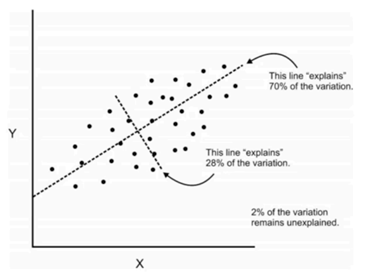

    +  First principal component is a linear combination of original predictor variables which captures thee maximum variance in the dataset. It determines the direction of highest variability in the data. This minimizes the sum of squared distance between a data point and the line. 
    + Second principle component captures the remaining variance and is uncorrelated to the first PC and these 2 are orthogonal.
    
###  <font color=blue>Algorithm</font>
1. Standardize data
2. Calculate the covariance matrix
2. Obtain the Eigenvectors and Eigenvalues from the covariance matrix 
3. Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k <= d)
4. Construct the projection matrix W from the selected k eigenvectors
5. Transform the original dataset X via W to obtain a k-dimensional feature subspace Y

### <font color=blue>Train model</font>

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pc = pca.fit_transform(X_train)

### <font color=blue>How many components?</font>

The biggest decision to make when running a PCA is how many components to keep. A common approach is to visualize the variance in order from highest to lowest, connecting them with a line. Upon visual inspection, the analyst will keep all the components whose variance falls above the point where the slope of the line changes the most drastically, also called thee "elbow"

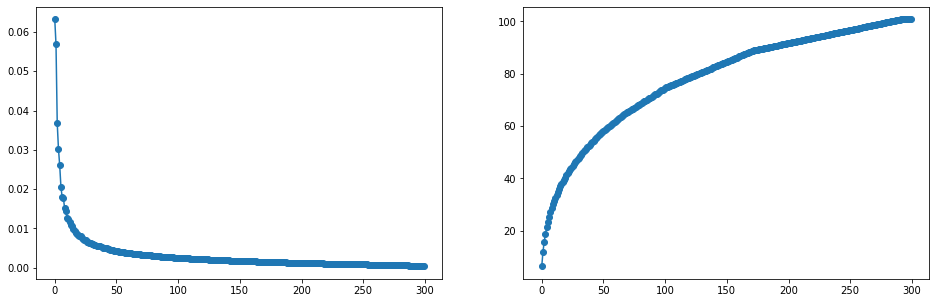

In [25]:
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax[0].plot(pca.explained_variance_ratio_, '-o')
ax[1].plot(cumsum, '-o')
plt.show()

=> The fig on the left side illustrates the variance of each principal component and the fig on the right hand side is the cummulative sum of these principal components

=> It can be seen from the plot that even the 1st principal component explains very little about the data (variance = 0.06) and the slope of the line falls dramatically at around k=30 principal components and the cumulative is only around 40 percent and this may be not enought to explain the data. Hence, the analysis uses about the first 50 principal components and this explains about 60 percent of data

In [26]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(X_train)
print('Cummulative explained variation for the first 50 principal components:  {}'.format(np.sum(pca.explained_variance_ratio_)))

pca_df = pd.DataFrame(pca_result)
pca_df.head()

Cummulative explained variation for the first 50 principal components:  0.5730564594268799


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.290,-0.045,0.108,-0.265,-0.156,-0.293,-0.389,-0.066,-0.143,-0.322,-0.258,0.029,-0.189,-0.002,-0.123,-0.228,0.124,-0.318,-0.071,-0.165,0.111,-0.050,0.166,0.088,0.092,-0.167,-0.133,-0.178,-0.209,-0.046,-0.153,0.072,0.050,0.065,0.169,0.072,-0.073,0.214,-0.048,0.075,0.111,-0.091,-0.165,0.178,0.033,0.021,-0.217,0.044,-0.004,0.126
1,-0.515,-0.266,-0.199,-0.024,0.029,0.104,-0.189,0.060,-0.004,-0.278,0.095,-0.077,0.130,0.380,-0.284,0.389,0.087,-0.015,-0.073,-0.069,0.225,0.318,-0.180,0.217,0.061,-0.206,-0.071,0.016,0.062,-0.143,0.217,0.057,-0.045,0.104,-0.074,0.067,0.184,-0.089,-0.047,0.049,-0.203,-0.093,0.051,-0.128,0.129,0.011,0.122,0.057,0.117,0.058
2,0.229,-0.466,0.412,0.128,0.127,0.190,0.122,0.002,0.056,0.092,0.306,-0.016,-0.122,0.127,0.230,-0.088,0.096,0.141,-0.031,0.066,-0.155,-0.031,0.053,-0.002,-0.060,0.017,0.023,-0.088,0.056,-0.026,-0.017,0.012,-0.129,0.149,-0.117,-0.038,-0.038,-0.091,-0.040,0.097,0.102,-0.043,-0.107,-0.205,-0.076,0.003,-0.008,-0.128,0.091,-0.079
3,-0.149,-0.286,0.015,0.316,-0.664,-0.131,0.201,-0.011,0.034,-0.087,0.178,0.028,-0.294,-0.258,-0.355,0.050,0.001,-0.030,-0.083,-0.115,0.081,-0.277,0.046,0.096,0.043,-0.170,-0.157,0.068,0.067,0.149,0.041,-0.094,0.081,0.113,-0.062,0.031,0.127,0.050,-0.151,0.131,0.028,0.041,0.080,0.007,-0.081,-0.082,-0.042,-0.076,-0.008,0.104
4,-0.139,-0.060,0.042,0.186,-0.496,-0.180,0.130,0.044,-0.020,0.336,0.062,-0.032,0.002,-0.078,-0.091,-0.075,-0.231,-0.045,0.157,0.133,-0.015,0.089,0.137,-0.240,0.212,0.218,0.051,0.074,-0.017,-0.090,0.067,-0.215,0.029,-0.109,0.117,-0.222,-0.012,-0.071,-0.061,-0.089,0.106,-0.112,-0.072,-0.030,0.135,0.245,0.112,0.154,0.080,0.091


### <font color=blue>Using TSNE algorithm to visualize data on 2D space</font>

1. t-Distributed Stochastic Neighbor Embedding (t-SNE) is **a non-linear technique for dimensonality reduction** that is particularly well suited for the visualization of high-dimensional datasets. **t-SNE gives us a feel or intuition of how the data is arranged in a high-dimensional space**. 


2. The idea of TSNE is **t-SNE minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding**. In this way, t-SNE maps the multi-dimensional data to a lower dimensional space and attempts to find patterns in the data by indentifying observed clusters based on similarity of data points with multiple features. However, after this process, the input features are no longer identifiable, and you cannot make any inference based only on the output of t-SNE. Hence it is mainly a data exploration and visualization technique.


3. It is highly recommended to use dimensionality reduction method to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.


4. **t-SNE vs. PCA**
    + PCA is a **linear dimension reduction technique** that seeks to **maximize variance and preserves large pairwise distances**. This can lead to poor visulization especially when dealing with non-linear manifold structures such as any geometric shape like: cylinder, ball, curve, etc.
PCA preserves only the global structure of the data. PCA is concerned with preserving large pairwise distances to maximize variance. 
    + TSNE is a **non-linear dimensionality reduction technique** preserves both the local and global structure. It uses the local relationship between data to map the high-dimensional data in two dimensions, **preserving only small pairwise distances or local similarities**. 

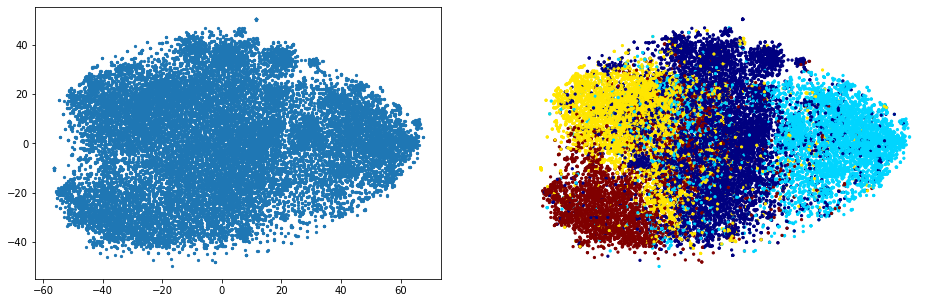

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(pca_df)

plot_cluster(X_train_tsne, y_train)

=> The fig on the left is the shape/pattern of data after being compressed using PCA and T-SNE, and the fig on the right hand side is the data with 4 colors representing 4 underlying classses

=> Assuming that we don't have label (hence the fig on the right hand side is not available), it can be seen on the left fig that the plot suggests there are around 3 clusters: left, middle and right

 ## <font color=red>**4.2. Stacked AutoEncoder**</font>
 
 ###  <font color=blue>Introduction</font>
 
1.	An auto-encoder is a kind of intersection between supervised and unsupervised learning that is commonly used for dimensionality reduction and feature discovery. More precisely, an auto-encoder is a feedforward neural network that is trained to predict the input itself. 


2. To prevent the system from learning the trivial identity mapping, the hidden layer in the middle is usually constrained to be a narrow bottleneck. The system can minimize the reconstruction error by ensuring the hidden units capture the most relevant aspects of the data which can be considered as the lower representation of data

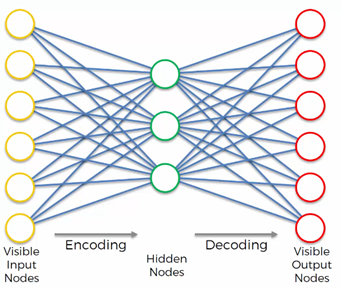


In [28]:
# Deep Learning libraries
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers  import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import datetime

In [29]:
tf.random.set_seed(42)
np.random.seed(42)
keras.backend.clear_session()

# No of neurons in each layer
input_dim = X_train.shape[1]
encoding1_dim = 80
encoding2_dim = 600
latent_dim = 18

input_layer = Input(shape=(input_dim, ))
encoder = Dense(int(encoding1_dim), activation="relu")(input_layer)
encoder = Dense(int(encoding2_dim), activation="relu")(encoder)
encoder = Dense(int(latent_dim), activation="tanh")(encoder)
decoder = Dense(int(encoding2_dim), activation="tanh")(encoder)
decoder = Dense(int(encoding1_dim), activation="relu")(decoder)
decoder = Dense(int(input_dim), activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense (Dense)               (None, 80)                24080     
                                                                 
 dense_1 (Dense)             (None, 600)               48600     
                                                                 
 dense_2 (Dense)             (None, 18)                10818     
                                                                 
 dense_3 (Dense)             (None, 600)               11400     
                                                                 
 dense_4 (Dense)             (None, 80)                48080     
                                                                 
 dense_5 (Dense)             (None, 300)               24300 

In [30]:
# this model maps an input to its encoded representation
encoder_layer = Model(input_layer, encoder)
# create a placeholder for an encoded input
encoded_input = Input(shape=(int(latent_dim),))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3]
# create the decoder model
decoder_layer = Model(encoded_input, decoder_layer(encoded_input))

decoder_layer

In [31]:
nb_epoch = 30
batch_size = 100000
autoencoder.compile(optimizer='adam', loss='mse')

cp = ModelCheckpoint(filepath='autoencoder1.h5', save_best_only=True, verbose=0)
tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
t_ini = datetime.datetime.now()
history = autoencoder.fit(X_train, 
                          X_train, 
                          epochs=nb_epoch, 
                          #batch_size=batch_size, 
                          shuffle=True, 
                          validation_split=0.2, 
                          verbose=1
).history
t_fin = datetime.datetime.now()
print('Time to run the model: {} Sec.'.format((t_fin - t_ini).total_seconds()))

df_history = pd.DataFrame(history)

Epoch 1/30
560/560 [==============================] - 2s 4ms/step - loss: 0.0962 - val_loss: 0.0932
Epoch 2/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0833 - val_loss: 0.0731
Epoch 3/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0695 - val_loss: 0.0657
Epoch 4/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0612 - val_loss: 0.0533
Epoch 5/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0457 - val_loss: 0.0406
Epoch 6/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0346 - val_loss: 0.0278
Epoch 7/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0232
Epoch 8/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0207 - val_loss: 0.0182
Epoch 9/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0174 - val_loss: 0.0173
Epoch 10/30
560/560 [==============================] - 2s 3ms/step - loss: 0.0159 - val_loss: 0.0143

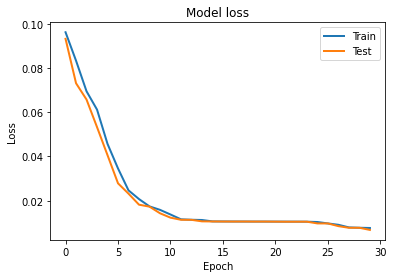

In [32]:
plt.plot(df_history['loss'], linewidth=2, label='Train')
plt.plot(df_history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [33]:
encoded = encoder_layer.predict(X_train)
ae_embeddings = pd.DataFrame(encoded)
print(ae_embeddings.shape)
ae_embeddings.head()

(22400, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.105,0.094,0.066,0.146,0.064,0.059,-0.034,-0.000,-0.234,-0.088,0.056,-0.121,0.197,-0.078,-0.233,0.104,-0.112,0.649
1,-0.069,-0.047,-0.037,0.097,0.120,-0.075,0.155,-0.038,-0.052,-0.161,0.014,-0.015,-0.032,-0.008,-0.027,-0.026,-0.198,0.609
2,-0.011,-0.014,0.013,-0.156,-0.039,0.090,-0.047,-0.089,0.110,0.094,-0.052,0.085,0.058,0.046,-0.216,-0.249,-0.023,0.580
3,-0.157,0.098,-0.176,-0.050,-0.058,0.027,0.059,0.037,-0.073,0.151,0.186,0.042,0.209,-0.082,-0.114,-0.071,-0.009,0.656
4,0.005,-0.032,-0.129,-0.172,-0.032,0.048,0.162,0.135,0.088,0.029,0.083,-0.024,-0.074,-0.129,-0.166,0.086,0.013,0.628


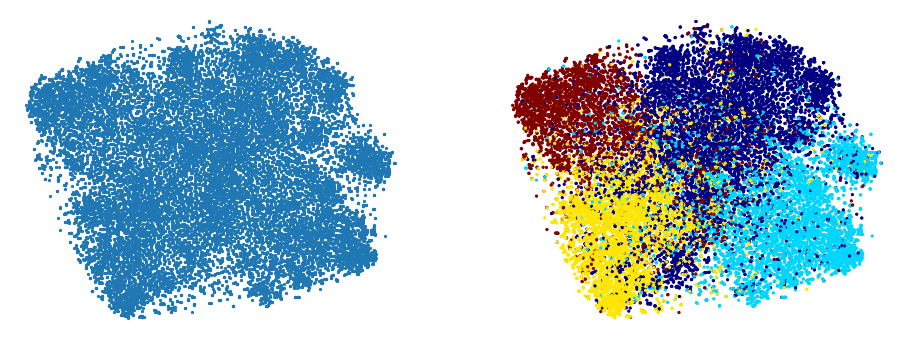

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=9)
X_train_tsne = tsne.fit_transform(ae_embeddings)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=5)
plt.axis("off")
#plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=5, cmap="jet")
plt.axis("off")
plt.show()

=> The fig on the left is the shape/pattern of data after being compressed using PCA and T-SNE, and the fig on the right hand side is the underlying topic/class of the data

=> Assuming that we don't have label (hence the fig on the right hand side is not available), it can be seen on the left fig that the plot suggests there are around 4 clusters, 1 cluster at the top, and 2 clusters at middle, 1 cluster at the bottom

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">5. CLUSTERING</div>

## <font color=red>**5.1. Introduction**</font>

Now, it's time to apply clustering technique for solving topic modeling problem. Upon the visual inspection, we can see that the shapes of data have simple blobs, the k-means algorithm can quickly label those clusters in a way that closely matches what we might do by eye. 

The K-Means algorithm is one of the most popular clustering methods. It is intended for situations in which all variables are of the quantitative type, and squared Euclidean distance is chosen as the dissimilarity measure

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest
1.	Choose the number of clusters, K stands for the number of clusters
2.	Select randomly k objects from the dataset as the initial cluster centers or means
3.	Calculate Euclidean distance between each point and each cluster (centroid), then assign datapoint to the closed centroid
4.	Adjust/Recalculate the centroids: For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the cluster
5.	Repeat the last two steps until we can no longer assign the point to a centroid: Iteratively minimize the total within sum of square in a given cluster. That is, iterate until the cluster assignments stop changing or the maximum number of iterations is reached

Furthermore, this section uses 3 training dataset to compare the performance and find the best solution

In [35]:
from sklearn.cluster import KMeans
from scipy import stats

def specify_num_of_clusters(data, n_clusters):
    wcss = []
    for i in range(1, n_clusters):
        kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        
    plt.plot(range(1,11), wcss)
    plt.title('Elbow Method')
    plt.xlabel("K Clusters")
    plt.ylabel("WCSS")
    plt.show()
    
    

def mapping_cluster_class(y, cluster):
    mapping = {}
    for class_id in np.unique(y):
        mode, _ = stats.mode(cluster[y==class_id])
        print(mode)
        mapping[mode[0]] = class_id
    return mapping


 ## <font color=red>**5.2. High dimensionality dataset**</font>

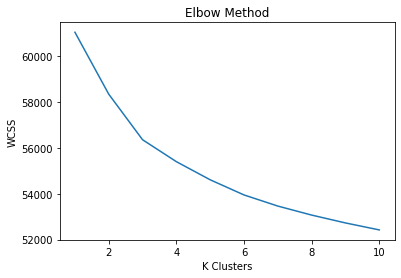

In [36]:
specify_num_of_clusters(X_train, 11)

In [37]:
kmeans = KMeans(n_clusters=4, random_state=9)
kmeans.fit(X_train)
kmeans_labels = kmeans.labels_
cluster_df = pd.DataFrame()
cluster_df['KMeans'] = kmeans_labels
cluster_class = mapping_cluster_class(y_train, kmeans_labels)
cluster_df['Cluster'] = cluster_df['KMeans'].map(cluster_class)

[2]
[0]
[1]
[3]


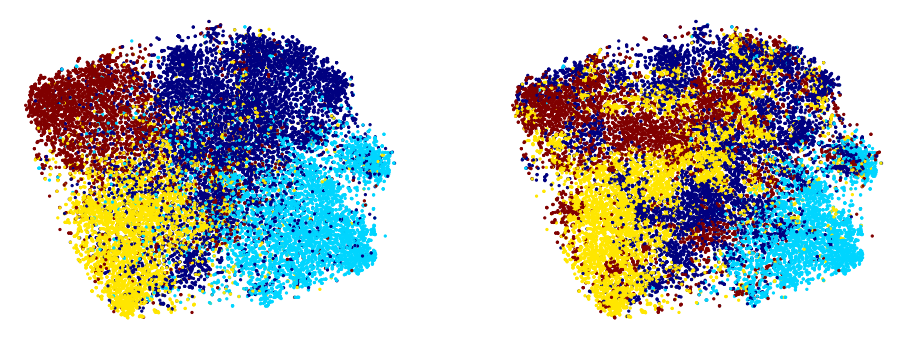

In [38]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=5, cmap="jet")
plt.axis("off")
#plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=cluster_df['Cluster'], s=5, cmap="jet")
plt.axis("off")
plt.show()

+ The fig in the left hand side are the underlying distributions of data in 4 classes. The fig in the right hand side are the clustered data by KMeans

=> It's clearly to see that with hight dimensionality data (300 features), KMeans did not work very well, data in the same class (especially dark blue in the left fig) is mixed of many clusters 

 ## <font color=red>**5.3. PCA + KMeans**</font>

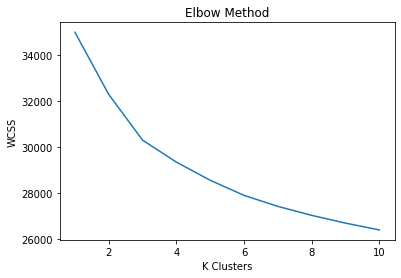

In [39]:
specify_num_of_clusters(pca_df, 11)

In [40]:
kmeans = KMeans(n_clusters=4, random_state=9)
kmeans.fit(pca_df)
PCA_Kmeans = kmeans.labels_
cluster_df = pd.DataFrame()
cluster_df['PCA_Kmeans'] = PCA_Kmeans
cluster_class = mapping_cluster_class(y_train, PCA_Kmeans)
cluster_df['Cluster'] = cluster_df['PCA_Kmeans'].map(cluster_class)

[3]
[0]
[1]
[2]


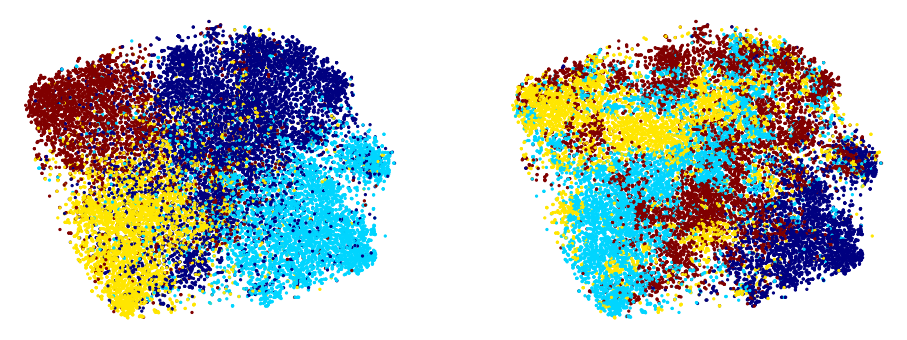

In [41]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=5, cmap="jet")
plt.axis("off")
#plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=PCA_Kmeans, s=5, cmap="jet")
plt.axis("off")
plt.show()

+ The fig in the left hand side are the underlying distributions of data in 4 classes. The fig in the right hand side are the clustered data by KMeans

=> It's clearly to see that with hight dimensionality data (300 features), KMeans did not work very well, data in the same class (especially dark blue in the left fig) is mixed of many clusters 

 ## <font color=red>**5.4. AE + KMeans**</font>

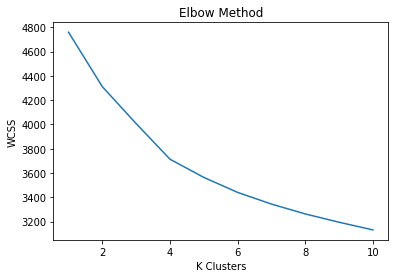

In [42]:
specify_num_of_clusters(ae_embeddings, 11)

In [43]:
ae_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.105,0.094,0.066,0.146,0.064,0.059,-0.034,-0.000,-0.234,-0.088,0.056,-0.121,0.197,-0.078,-0.233,0.104,-0.112,0.649
1,-0.069,-0.047,-0.037,0.097,0.120,-0.075,0.155,-0.038,-0.052,-0.161,0.014,-0.015,-0.032,-0.008,-0.027,-0.026,-0.198,0.609
2,-0.011,-0.014,0.013,-0.156,-0.039,0.090,-0.047,-0.089,0.110,0.094,-0.052,0.085,0.058,0.046,-0.216,-0.249,-0.023,0.580
3,-0.157,0.098,-0.176,-0.050,-0.058,0.027,0.059,0.037,-0.073,0.151,0.186,0.042,0.209,-0.082,-0.114,-0.071,-0.009,0.656
4,0.005,-0.032,-0.129,-0.172,-0.032,0.048,0.162,0.135,0.088,0.029,0.083,-0.024,-0.074,-0.129,-0.166,0.086,0.013,0.628


In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=25)
kmeans.fit(ae_embeddings)
AE_Kmeans = kmeans.labels_
cluster_df = pd.DataFrame()
cluster_df['AE_Kmeans'] = AE_Kmeans
cluster_class = mapping_cluster_class(y_train, AE_Kmeans)
cluster_df['Cluster'] = cluster_df['AE_Kmeans'].map(cluster_class)

[3]
[2]
[0]
[1]


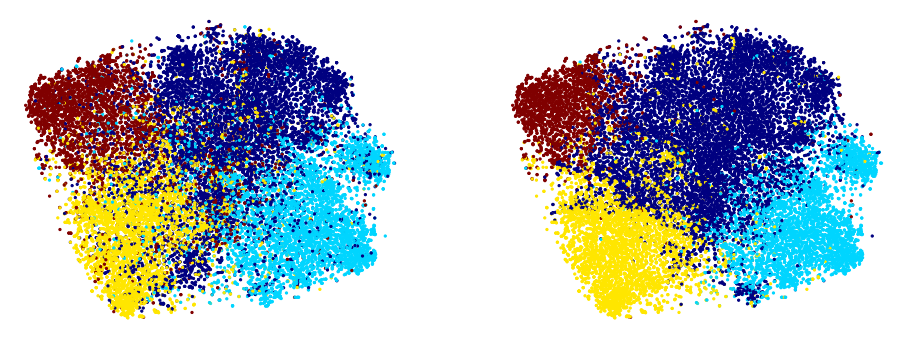

In [45]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=5, cmap="jet")
plt.axis("off")
#plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=cluster_df['Cluster'], s=5, cmap="jet")
plt.axis("off")
plt.show()

+ The fig in the left hand side are the underlying distributions of data in 4 classes. The fig in the right hand side are the clustered data by KMeans

=> latent features compressed by Autoencoder is the best for applying KMeans. Here we can see that the cluster is quite similar with the underlying classes

In [46]:
mapping_number_label = y_train.map({0:'TRAVEL', 1:'FOOD & DRINK', 2:'BUSINESS', 3:'SPORTS'})
mapping_number_label[0]

'SPORTS'

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">6. LDA</div>

 ## <font color=red>**6.1. Introduction**</font>

Besides document terms, phrases and similarities, we can also use some summarization techniques to extract topic or concept based features from text documents. The idea of topic models revolves around the process of extracting key themes or concepts from a corpus of documents which are represented as topics. Each topic can be represented as a bag or collection of words/terms from the document corpus. Together, these terms signify a specific topic, theme of a concept and each topic can be easily distinguished from other topics by virtue of the semantic meaning covered by these terms. These concepts can range from simple factos and statements to opinions and outlook. Topic models are extremely useful in summarizing large corpus of text documents to extract and depict key concepts. They are also useful in extracting features from text data that capture latent patterns in the data.

There are various techniques for topic modeling and most of them involve some form of matrix decomposition. 

### Latent Semantic Indexing (LSI)

Some techniques like Latent Semantic Indexing (LSI) use matrix decomposition operations, more specifically Singular Valued Decomposition, to split a term-document matrix (transpose of our TF-IDF document-term feature matrix) into three matrices U, S and V.T. You can use the left singluar vectors in matrix U and multiply it by the singular vectors S to get terms and their weights (signifying importance) per topic

### Latent Dirichlet Allocation (LDA)

LDA uses a generative probabilistic model where each document consists of a combination of several topics and each term or work can be assigned to a speciic topic. This is similar to pLSI based moeld (probabilistic LSI). Each latent topic contains a Dirichlet prior over them in the case of LDA. For the purpose of feature engineering, you need to remember that when LDA is applied on a docuemnt-term matrix (TF-IDF feature matrix), it gets decomposed into two main components. A document-topic matrix, which would be the feature matrix we are looking for and a topic-term matrix, which helps us in looking at potential topics in the corpus.

The following code builds an LDA model to extract features and topics from our sample corpus

 ## <font color=red>**6.2. Apply to DS**</font>

### <font color=blue> Decomposition

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(2, max_iter=100, random_state=42)
dt_matrix = lda.fit_transform(tv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2'])
features

,T1,T2
0,0.191,0.809
1,0.177,0.823
2,0.846,0.154
3,0.815,0.185
4,0.181,0.819
5,0.839,0.161


dt_matrix refers to the document-topic matrix giving us two features since we choose number of topics to be 2. 

#### Show topics and their weights

You can also use the other matrix obtained from the decomposition, the topic-term matrix to see the topics extracted from our corpus using the LDA model

In [36]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()


[('brown', 1.7273638692668465), ('dog', 1.7273638692668465), ('fox', 1.7273638692668465), ('lazy', 1.7273638692668465), ('quick', 1.7273638692668465), ('jumps', 1.0328325272484777), ('blue', 0.7731573162915626)]

[('sky', 2.264386643135622), ('beautiful', 1.9068269319456903), ('blue', 1.7996282104933266), ('love', 1.148127242397004), ('today', 1.0068251160429935)]



### <font color=blue> Clustering documents using topic model features

The preceding output represents each of the two topics as a collection of terms and their importance is depicted by the corresponding weight. It is definitely interesting to see that the two topics are quite distinguishable from each other by looking at the terms. This is reinforced by applying our unsupervised K-means clustering algorithm on our document-topic feature matrix (dt_matrix) usign the following code sinppet

In [28]:
km = KMeans(n_clusters=2)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,0
3,The brown fox is quick and the blue dog is lazy!,animals,0
4,The sky is very blue and the sky is very beaut...,weather,1
5,The dog is lazy but the brown fox is quick!,animals,0


http://localhost:8888/notebooks/OneDrive/00-DataAnalytics/01-ML/13-NLP/05-Topic-Modeling/00-Latent-Dirichlet-Allocation.ipynb

In [102]:
npr = pd.read_csv('data/npr.csv')

npr.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [103]:
from sklearn.feature_extraction.text import CountVectorizer

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [104]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [105]:
dtm = cv.fit_transform(npr['Article'])

In [106]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [108]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=7,random_state=42)
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

### <font color=blue> Showing Stored Words

In [41]:
len(cv.get_feature_names())

54777

In [42]:
import random

In [43]:
for i in range(10):
    random_word_id = random.randint(0,54776)
    print(cv.get_feature_names()[random_word_id])

cred
fairly
occupational
temer
tamil
closest
condone
breathes
tendrils
pivot


In [44]:
for i in range(10):
    random_word_id = random.randint(0,54776)
    print(cv.get_feature_names()[random_word_id])

foremothers
mocoa
ellroy
liron
ally
discouraged
utterance
provo
videgaray
archivist


### <font color=blue> Showing Top Words Per Topic

In [46]:
len(LDA.components_)

7

In [47]:
LDA.components_

array([[8.64332806e+00, 2.38014333e+03, 1.42900522e-01, ...,
        1.43006821e-01, 1.42902042e-01, 1.42861626e-01],
       [2.76191749e+01, 5.36394437e+02, 1.42857148e-01, ...,
        1.42861973e-01, 1.42857147e-01, 1.42906875e-01],
       [7.22783888e+00, 8.24033986e+02, 1.42857148e-01, ...,
        6.14236247e+00, 2.14061364e+00, 1.42923753e-01],
       ...,
       [3.11488651e+00, 3.50409655e+02, 1.42857147e-01, ...,
        1.42859912e-01, 1.42857146e-01, 1.42866614e-01],
       [4.61486388e+01, 5.14408600e+01, 3.14281373e+00, ...,
        1.43107628e-01, 1.43902481e-01, 2.14271779e+00],
       [4.93991422e-01, 4.18841042e+02, 1.42857151e-01, ...,
        1.42857146e-01, 1.43760101e-01, 1.42866201e-01]])

In [48]:
len(LDA.components_[0])

54777

In [49]:
single_topic = LDA.components_[0]

In [50]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([ 2475, 18302, 35285, ..., 22673, 42561, 42993], dtype=int64)

In [51]:
# Word least representative of this topic
single_topic[18302]

0.14285714309286987

In [52]:
# Word most representative of this topic
single_topic[42993]

6247.245510521082

In [53]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673, 42561,
       42993], dtype=int64)

In [54]:
top_word_indices = single_topic.argsort()[-10:]

In [55]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

new
percent
government
company
million
care
people
health
said
says


These look like business articles perhaps... Let's confirm by using .transform() on our vectorized articles to attach a label number. But first, let's view all the 10 topics found.

In [56]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

### <font color=blue>Attaching Discovered Topic Labels to Original Articles

In [57]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [58]:
dtm.shape

(11992, 54777)

In [59]:
len(npr)

11992

In [60]:
topic_results = LDA.transform(dtm)

In [61]:
topic_results.shape

(11992, 7)

In [62]:
topic_results[0]

array([1.61040465e-02, 6.83341493e-01, 2.25376318e-04, 2.25369288e-04,
       2.99652737e-01, 2.25479379e-04, 2.25497980e-04])

In [63]:
topic_results[0].round(2)

array([0.02, 0.68, 0.  , 0.  , 0.3 , 0.  , 0.  ])

In [64]:
topic_results[0].argmax()

1

This means that our model thinks that the first article belongs to topic #1.

### <font color=blue> Combining with Original Data

In [65]:
npr.head()

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",6


In [66]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 3, 4, 0], dtype=int64)

In [67]:
npr['Topic'] = topic_results.argmax(axis=1)

In [68]:
npr.head(10)

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2
5,I did not want to join yoga class. I hated tho...,3
6,With a who has publicly supported the debunk...,3
7,"I was standing by the airport exit, debating w...",2
8,"If movies were trying to be more realistic, pe...",3
9,"Eighteen years ago, on New Year’s Eve, David F...",2
